Dataset link: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

## Preview of Data

We have BigMarts Sales data collected in 2013 which is bifurcated in train (8523 records & 12 attributes) and test (5681 records & 11 attributes) data set, train data set has both independant and dependant variable(s) given below



*   Item_Identifier: Product ID
*   Item_Weight: Weight of Product
*   Item_Fat_Content: Fat content of Product- Low/Regular
*   Item_Visibility: Parameter to know the visiblity/reach of product
*   Item_Type: Category of Product
*   Item_MRP: Maximum Retail Price of the Product
*   Outlet_Identifier: Store ID
*   Outlet_Establishment_Year: The Year in which store is established
*   Outlet_Size: Areawise distribution of Stores- Low/Medium/High
*   Outlet_Location_Type: Type of city in which outlet is located
*   Outlet_Type: Type of outlet - Grocery store or supermarket
*   Item_Outlet_Sales: Sale price of product - The dependant variable to be    predicted

# The Hypothesis 

1) Locality: Outlet in populated locality should generate more revenue

2) Spending Capacity: Tier 1 should have more spending capacity than tier 2 and tier 3

3) Product Selection: Tier 1 should prefer low fat content food as they tend to be more aware of their health

4) Item Visiblity: More visible Item should have more revenue generating power

5) Area: Stores which have early establishment could have higher outlet size

6) MRP: Consumers prefer reasonable product or Branded products   

# Problem Statment


We need to analyse the dataset and come up with more insights and
our main task is to predict the Sales figure for the test dataset




## Approach

1) By applying Exploratory Data Analysis we will identify the relation between different attributes and evaluate meaningful information

2) By applying different supervised machine learning algorithms we will predict the sales for test dataset

# Aim of the Project

The main objective is to find the sales per product for each store and evaluate meaningful insights. Using this model, BigMart will try to understand different attributes of the product and apply them to increase their overall sales

# Part 1: Data Preprocessing

## Importing the Librabies and Dataset 

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings# warning filter

#ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split


#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## Display all the rows of the dataframe
#pd.pandas.set_option('display.max_rows',None)



In [2]:
dataset = pd.read_csv('/content/Train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(8523, 12)


## Data Exploration

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# check the columns
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [7]:
# Check the no. of coloumns which contain string
len(dataset.select_dtypes(include='object').columns)


7

In [8]:
# Check the name of coloumns which contain numerical value
dataset.select_dtypes(include=['int64', 'float64']).columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
# Check the no. of coloumns which contain numerical value
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

5

In [10]:
# statistical summary
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Dealing with missing data

In [11]:
dataset.isnull().values.any()

True

In [12]:
dataset.isnull().values.sum()

3873

In [13]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# columns with null values
dataset.columns[dataset.isnull().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [15]:
len(dataset.columns[dataset.isnull().any()])

2

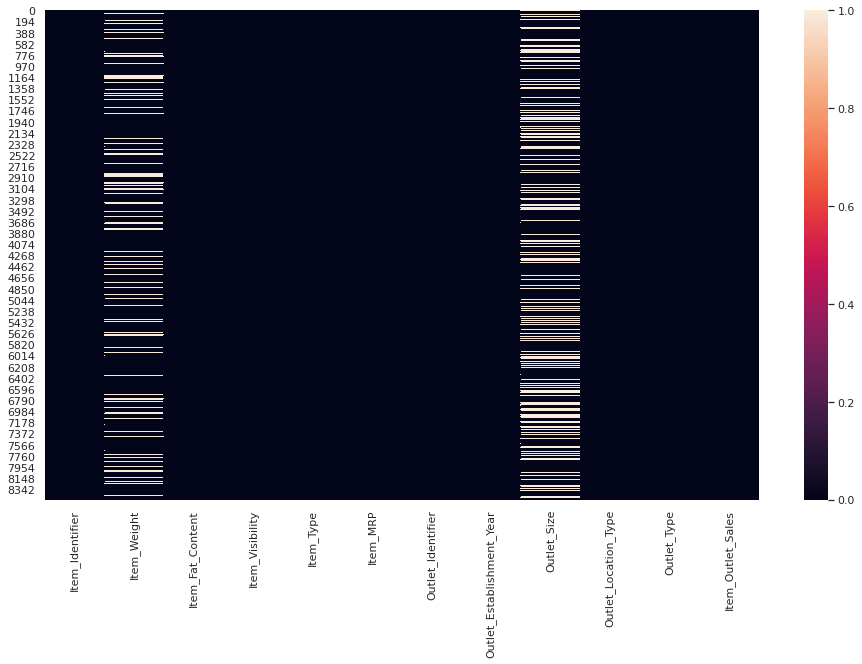

In [16]:
# null values with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())
plt.show()

In [17]:
null_percent = dataset.isnull().sum() / dataset.shape[0] * 100

# (missing values / total values) * 100

null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

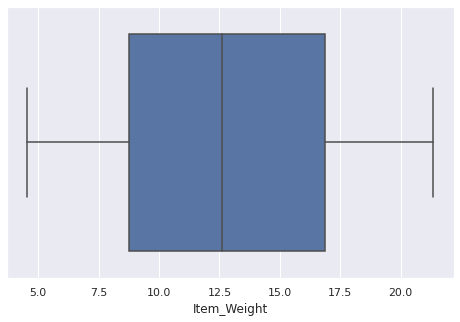

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=dataset)

Box Plot suggest we dont have any outlier and hence we can change missing values with 'Mean'

In [19]:
dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())

Since the Outlet_Size is a categorial variable we can change this missing values to "Mode"(Most Repeated Value)

In [20]:
dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0])

In [21]:
dataset.isnull().values.any()

False

In [22]:
len(dataset.columns[dataset.isnull().any()])

0

## Cleaning the Data

In [23]:
dataset['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDF52     9
NCF42     9
NCB18     9
         ..
FDT35     1
DRF48     1
FDY43     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [24]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’. We need to fix them

In [25]:
dataset['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [26]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [28]:
dataset['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
dataset['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
dataset['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
dataset['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

We will convert "Outlet_Establishment_Year" to Age of the Store to get more meaning from the data

In [32]:
dataset['Years_Established'] = dataset['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
dataset = dataset.drop(columns=['Outlet_Establishment_Year'])
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


# Part 2: Exploratory Data Analysis

## A] Univariate Analysis

In [33]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### 1) Item Fat Content

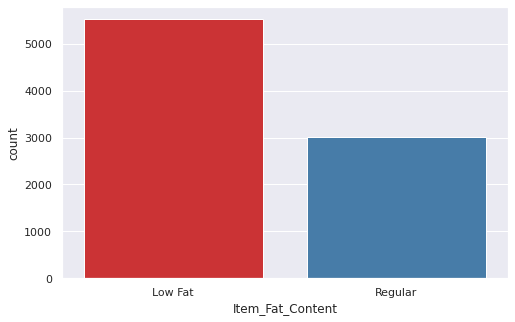

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=dataset,palette='Set1')

**Observation**: People bought more Low Fat Items

### 2) Item Type

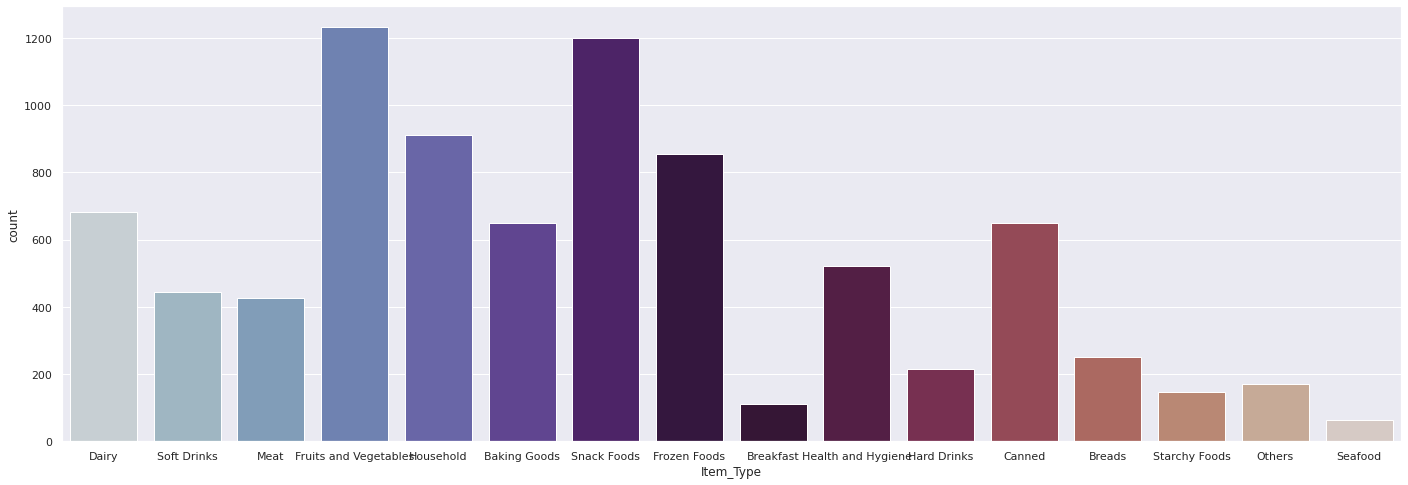

In [35]:
plt.figure(figsize=(24,8))
sns.countplot('Item_Type',data=dataset,palette='twilight')

**Observation**: People bought more Fruits and Vegetables

### 3) Outlet Size

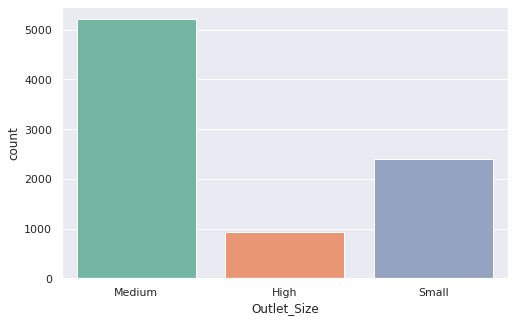

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=dataset,palette='Set2')

**Observation**: We have more Medium Outlets

### 4) Outlet Location

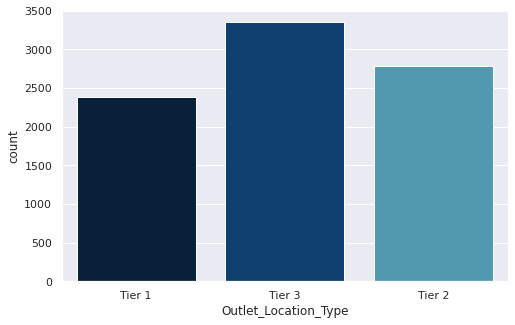

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=dataset,palette='ocean')

**Observation**: Maximum outlets in Tier 3 cities

### 5) Outlet Type

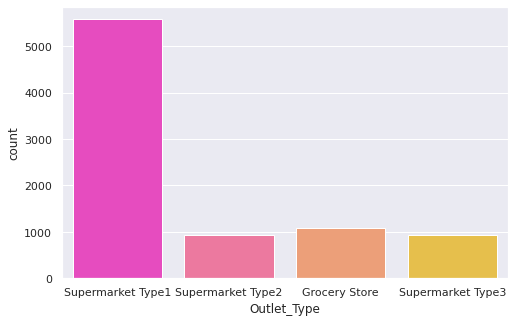

In [38]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=dataset,palette='spring')

**Observation**: Maximum supermarket are of Type 1

## B] Bivariate Analysis

In [39]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### 1) Item Fat Content to Item Outlet Sales

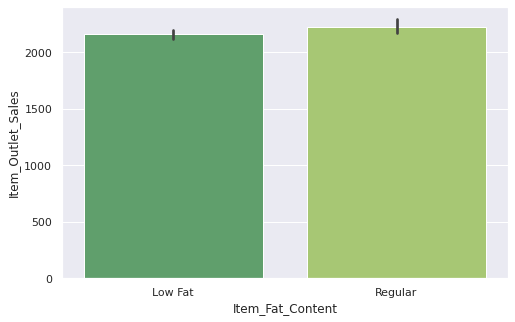

In [40]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=dataset,palette='summer')

**Observation**: Low Fat and Regular both are contributing equally to the revenue generation

### 2) Item Visiblity to Item Outlet Sales

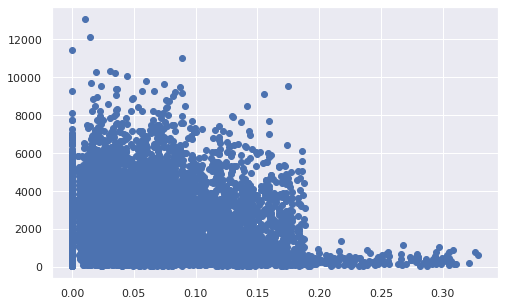

In [41]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=dataset)

**Observation**: Here we have intresting ovservation, where the visiblity of Items is Zero, which suggest those items kept behind in shelf and amlost have no visiblity can also be sold. This show Consumer tend to search for their own products 

### 3) Item Type to Item Outlet Sales

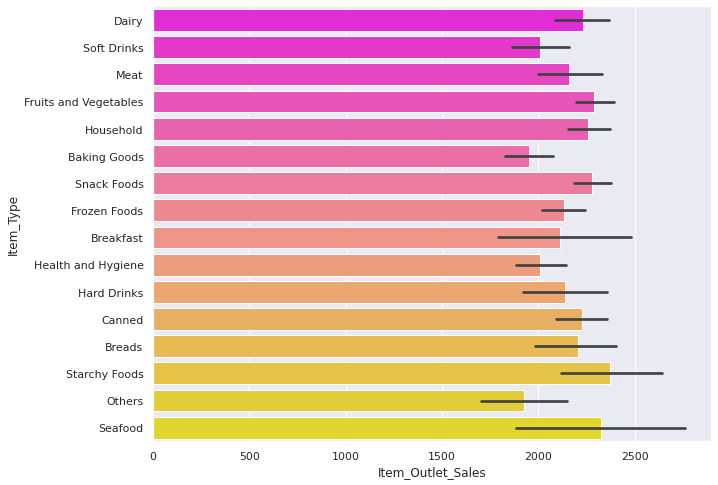

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=dataset,palette='spring')

**Observation**: Although Fruits and Vegetables unit sold are high, however revenue generated by Seafood is much higher, so we have to focus more on such products

### 4) Item MRP to Item Outlet Sales

Text(0, 0.5, 'Item Outlet Sales')

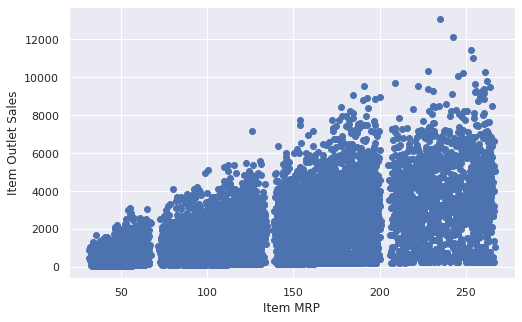

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=dataset)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

**Observation**: Items with higher MRP are sold maximum

### 5) Outlet Size to Item Outlet Sales

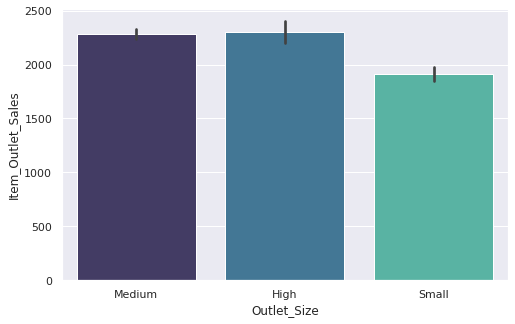

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=dataset,palette='mako')

**Observation**: Medium and High size outlet have maximum revenue generation power

### 6) Outlet Location to Item Outlet Sales

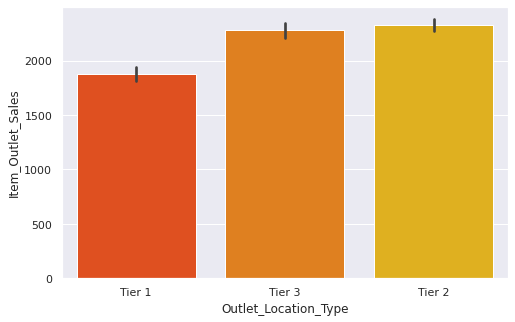

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=dataset,palette='autumn')

**Observation**: Tier 2 & 3 have more revenue generation power although we have maximum number ot outlet in Tier 3 cities so it justify the number

## C] Multivariate Analysis

In [46]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### 1) Item Type by Item Fat Content to Item Outlet Sales

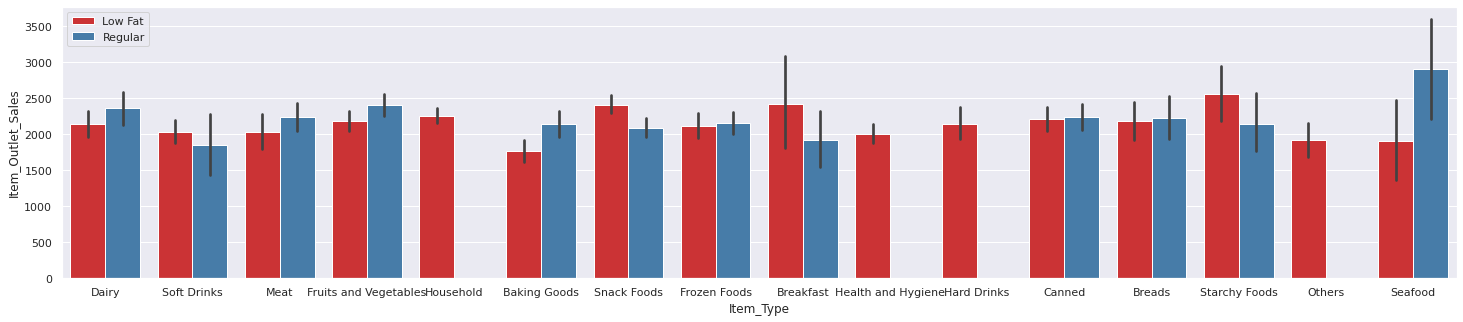

In [47]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=dataset,palette='Set1')
plt.legend()

**Observation**: Mostly we have equal revenue generation from Fat and Regular Food Items

### 2) Outlet Location Type by Outlet Type to Item Outlet Sales

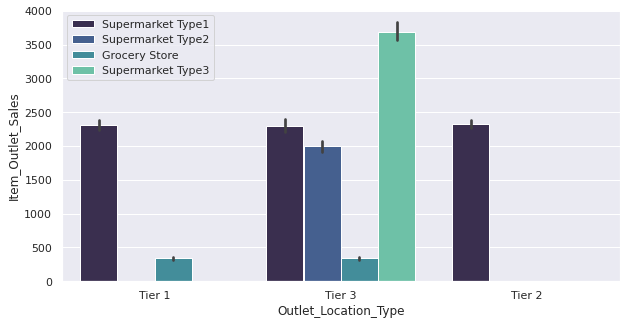

In [48]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=dataset,palette='mako')
plt.legend()

**Observation**: Here we have intresting ovservation, where the visiblity of Items is Zero, which suggest those items kept behind in shelf and amlost have no visiblity can also be sold. This show Consumer tend to search for their own products 

### Distplot

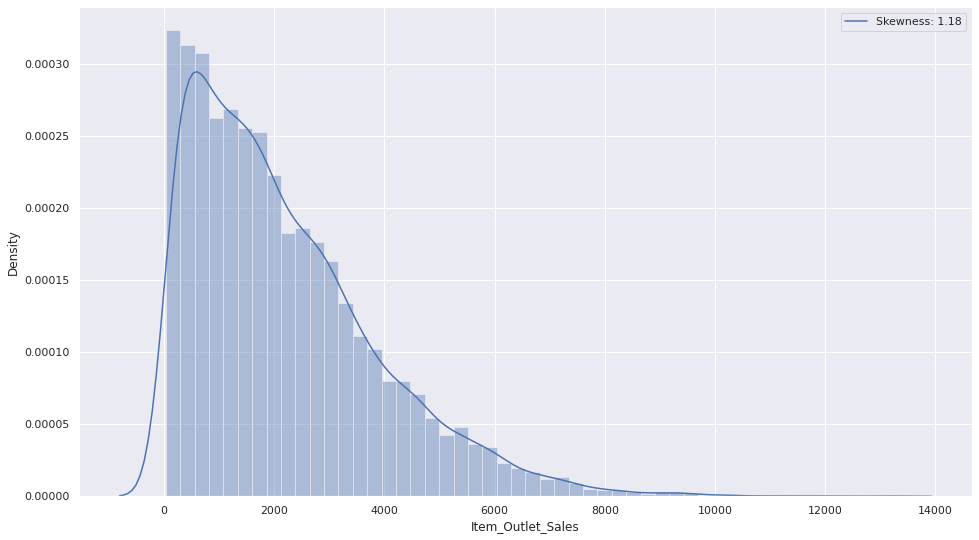

In [49]:
# distplot of the target variable

plt.figure(figsize=(16,9))
bar = sns.distplot(dataset['Item_Outlet_Sales'])
bar.legend(["Skewness: {:.2f}".format(dataset['Item_Outlet_Sales'].skew())])
plt.show()

### Correlation matrix

In [50]:
dataset_2 = dataset.drop(columns='Item_Outlet_Sales')

In [51]:
dataset_2.shape

(8523, 11)

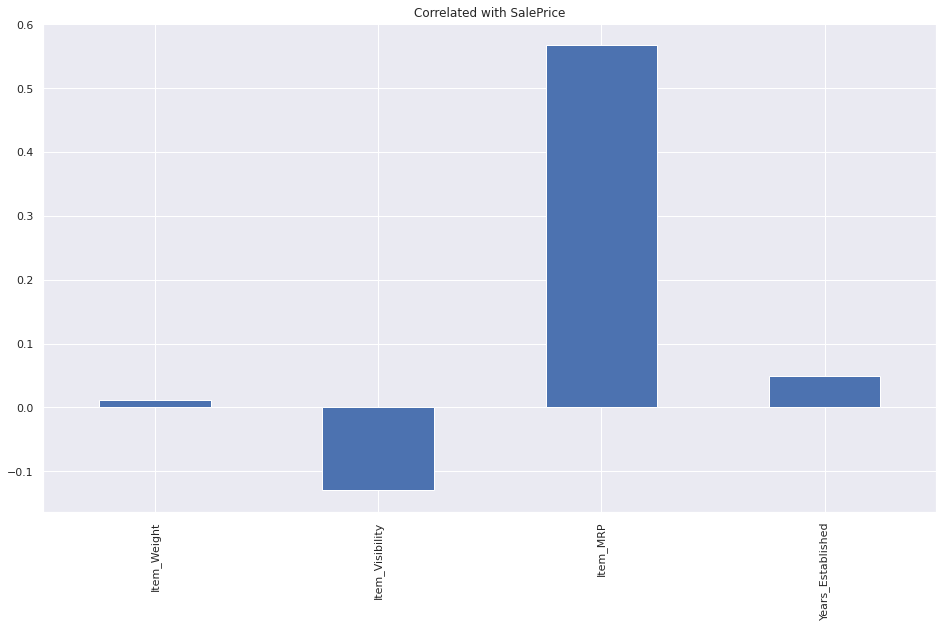

In [52]:
dataset_2.corrwith(dataset['Item_Outlet_Sales']).plot.bar(
    figsize=(16,9), title='Correlated with SalePrice', grid=True
)

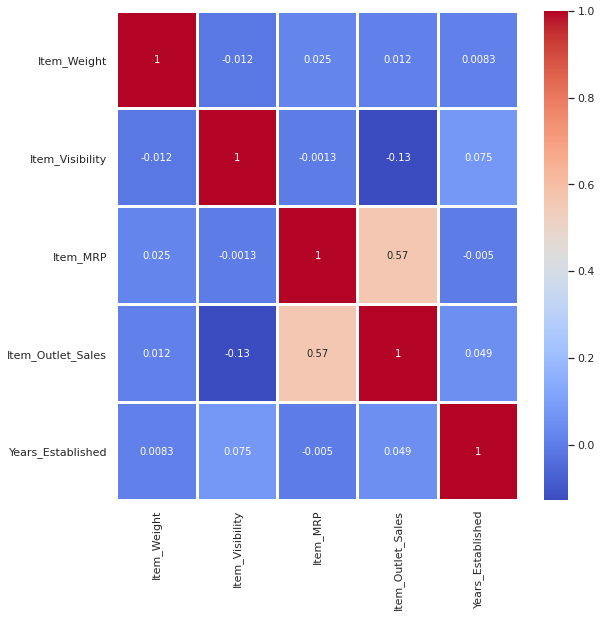

In [53]:
# heatmap
plt.figure(figsize=(9, 9))
ax = sns.heatmap(data=dataset.corr(), cmap='coolwarm', annot=True, linewidths=2)

# Part 3) Feature Enginering

## Label Encoding

In [54]:
#feature engineering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Outlet_Identifier','Item_Type']

for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
    

In [55]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,6,182.0950,0,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


## One Hot Encoding

In [56]:
dataset = dataset.drop(columns=['Item_Identifier'])
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,Low Fat,0.016047,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,0.019278,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,0.016760,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,0.000000,6,182.0950,0,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,0.000000,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


In [57]:
#feature engineering
from sklearn.preprocessing import OneHotEncoder

In [58]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset.shape

(8523, 15)

In [59]:
dataset.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,9,3735.1380,22,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,3,443.4228,12,1,1,0,0,1,0,1,0
2,17.50,0.016760,10,141.6180,9,2097.2700,22,0,1,0,0,0,1,0,0
3,19.20,0.000000,6,182.0950,0,732.3800,23,1,1,0,0,1,0,0,0
4,8.93,0.000000,9,53.8614,1,994.7052,34,0,0,0,0,1,1,0,0


## Removing Skewness

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility is highly skewed. So, we will treat skewness with the help of log transformation.

In [60]:
#dataset['Item_Visibility'] = np.log(dataset['Item_Visibility'])

In [61]:
#dataset.head()

*Skewness not taken into account as it was hindering the performance*

## Splitting the dataset

In [62]:
# independ variables / matrix of features
x = dataset.drop(columns='Item_Outlet_Sales')

In [63]:
# target variable / dependent variable
y = dataset['Item_Outlet_Sales']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [66]:
x_train.shape

(6818, 14)

In [67]:
y_train.shape

(6818,)

In [68]:
x_test.shape

(1705, 14)

In [69]:
y_test.shape

(1705,)

## Feature scaling

In [70]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

# Part 4: Building the model

In [71]:
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [72]:
#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


In [73]:
def cross_val(model_name,model,x,y,cv):
    
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## 1) Multiple Linear Regressor

In [74]:
#ML model
from sklearn.linear_model import LinearRegression

#model
regressor_mlr = LinearRegression()

#fit
regressor_mlr.fit(x_train, y_train)

#predict
y_pred = regressor_mlr.predict(x_test)

#score variables
LR_MAE = round(MAE(y_test, y_pred),2)
LR_MSE = round(MSE(y_test, y_pred),2)
LR_R_2 = round(R2(y_test, y_pred),4)
LR_CS  = round(CVS(regressor_mlr, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(regressor_mlr,LinearRegression(),x,y,5)

 Mean Absolute Error: 851.52

 Mean Squared Error: 1275654.43

 R^2 Score: 0.5642

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Scores:
0.57
0.56
0.55
0.57
0.57
Average LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) score: 0.5613


In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test, y_pred)

0.5641558984606749

In [77]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Linear_Regression.to_csv("Linear Regression.csv")   

## 2) Random Forest Regressor

In [78]:
#ML model
from sklearn.ensemble import RandomForestRegressor

#model
regressor_rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

#fit
regressor_rf.fit(x_train, y_train)

#predict
y_pred = regressor_rf.predict(x_test)

#score variables
RFR_MAE = round(MAE(y_test, y_pred),2)
RFR_MSE = round(MSE(y_test, y_pred),2)
RFR_R_2 = round(R2(y_test, y_pred),4)
RFR_CS  = round(CVS(regressor_rf, x, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(regressor_rf,RandomForestRegressor(),x,y,5)

 Mean Absolute Error: 780.11

 Mean Squared Error: 1200066.53

 R^2 Score: 0.59

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=101, verbose=0, warm_start=False) Scores:
0.58
0.53
0.53
0.55
0.57
Average RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estima

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5899814968406034

In [80]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")  

## 3) Lasso Regressor

In [81]:
#ML model
from sklearn.linear_model import Lasso

#model
regressor_ls = Lasso(alpha = 0.05)
#fit
regressor_ls.fit(x_train,y_train)

#predict
y_pred = regressor_ls.predict(x_test)

#score variables
LS_MAE = round(MAE(y_test, y_pred),2)
LS_MSE = round(MSE(y_test, y_pred),2)
LS_R_2 = round(R2(y_test, y_pred),4)
LS_CS  = round(CVS(regressor_ls, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(regressor_ls,Lasso(alpha = 0.05),x,y,5)

 Mean Absolute Error: 851.31

 Mean Squared Error: 1275582.84

 R^2 Score: 0.5642

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Scores:
0.57
0.56
0.55
0.57
0.57
Average Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) score: 0.5613


In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5641803578081257

In [83]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Lasso_Regressor.to_csv("Lasso Regressor.csv")    

## 4) XGBoost Regressor

In [84]:
#ML model
from xgboost import XGBRFRegressor

#model
regressor_xgb = XGBRFRegressor()

#fit
regressor_xgb.fit(x_train, y_train)

#predict
y_pred = regressor_xgb.predict(x_test)

#score variables
XGB_MAE = round(MAE(y_test, y_pred),2)
XGB_MSE = round(MSE(y_test, y_pred),2)
XGB_R_2 = round(R2(y_test, y_pred),4)
XGB_CS  = round(CVS(regressor_xgb, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {XGB_MAE}\n")
print(f" Mean Squared Error: {XGB_MSE}\n")
print(f" R^2 Score: {XGB_R_2}\n")
cross_val(regressor_xgb,XGBRFRegressor(alpha = 0.05),x,y,5)


[08:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Mean Absolute Error: 919.81

 Mean Squared Error: 1459762.76

 R^2 Score: 0.5013

[08:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:01] WARNING: /workspa

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5012528672172872

In [86]:
XGBoost_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
XGBoost_Regressor.to_csv("XGBoost Regressor.csv")  

## 5) Ridge Regressor

In [87]:
#ML model
from sklearn.linear_model import Ridge

#model
regressor_rd = Ridge(normalize=True)
#fit
regressor_rd.fit(x_train,y_train)

#predict
y_pred = regressor_ls.predict(x_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)
RD_CS  = round(CVS(regressor_rd, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RD_MAE}\n")
print(f" Mean Squared Error: {RD_MSE}\n")
print(f" R^2 Score: {RD_R_2}\n")
cross_val(regressor_rd,Ridge(normalize=True),x,y,5)

 Mean Absolute Error: 851.31

 Mean Squared Error: 1275582.84

 R^2 Score: 0.5642

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001) Scores:
0.38
0.38
0.38
0.37
0.38
Average Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001) score: 0.376


In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5641803578081257

In [89]:
Ridge_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Ridge_Regressor.to_csv("Ridge Regressor.csv")    

# Conclusion

In [90]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,XGB_MAE,RD_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,XGB_MSE,RD_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,XGB_R_2,RD_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,XGB_CS,RD_CS]

Models = pd.DataFrame({
    'Models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGBoost Regressor","Ridge Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,Models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,780.11,1200066.53,0.5900,0.5948
2,Lasso Regressor,851.31,1275582.84,0.5642,0.5613
4,Ridge Regressor,851.31,1275582.84,0.5642,0.3760
0,Linear Regression,851.52,1275654.43,0.5642,0.5613
3,XGBoost Regressor,919.81,1459762.76,0.5013,0.4919


# Realizations



1.   Random Forest is best performing Model
2.   MRP has huge correlation with the Outlet Sales
3.   For better performance we need parameter tuning 



a) R-Squared:
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

b) MAE and MSE:
MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

c) RMSE:
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.